## Исследование данных

Посмотрим на [датасет недвижимости в штате Вашингтон](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("http://www.soshnikov.com/temp/data/kc_house_data_processed.zip")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Основные поля

Признак | Расшифровка
--------|------------
date | дата
bedrooms | кол-во спален 
bathrooms | кол-во санузлов
sqft_living | жилая площадь
sqft_lot | общая площадь
floors | кол-во этажей
waterfront | выход к воде
view | с видом или без 
condition | состояние
grade | класс жилья 
sqft_above | площадь верхнего этажа
sqft_basement | площадь подвала 
yr_built | год постройки 
yr_renovated | год ремонта
zipcode | почтовый индекс 
lat | широта 
long | долгота


In [15]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [20]:
df.columns
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'logprice']


<AxesSubplot:>

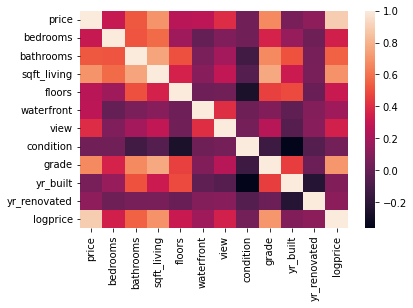

In [24]:
sns.heatmap(df[features].corr())

#### Визуализация данных

* Постройте график зависимости цены от разных параметров, например, площади дома (`sqft_living` или `sqft_lot`). Используйте Scatter Plot
* Используйте библиотеку Seaborn для построения зависимостей между различными столбцами данных. [Этот обучающий материал](https://pyprog.pro/sns/sns_5_statistical_dependencies.html), или [вот этот](https://kgptalkie.medium.com/complete-seaborn-python-tutorial-for-data-visualization-in-python-399af0792ef4) (на англ.) содержит хорошее введение в Seaborn. 
* Посмотрите, как средняя цена меняется в зависимости от наличия вида (`view`), выхода к воде (`waterfront`), состояния дома (`condition`), наличия ремонта. Используйте `groupby` и агрегирование.

<AxesSubplot:>

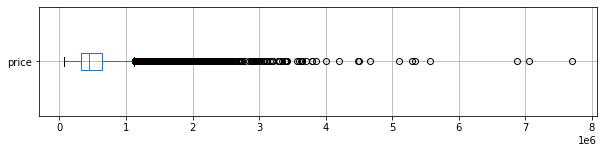

In [6]:
plt.figure(figsize=(10,2))
df.boxplot('price',vert=False)

(0.0, 3000000.0)

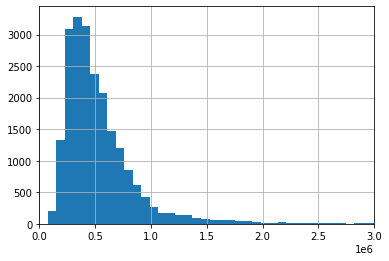

In [9]:
df['price'].hist(bins=100)
plt.xlim(0,3e6)

Коэффициент ассиметрии (skew):
$$
{E[(X-E[X])^3]\over\sigma^3}
$$

In [10]:
df['price'].skew()

4.024069144684712

<AxesSubplot:>

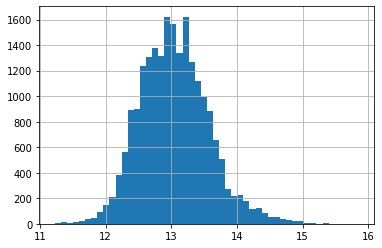

In [12]:
df['logprice'] = np.log(df['price'])
df['logprice'].hist(bins=50)

<AxesSubplot:xlabel='logprice', ylabel='Count'>

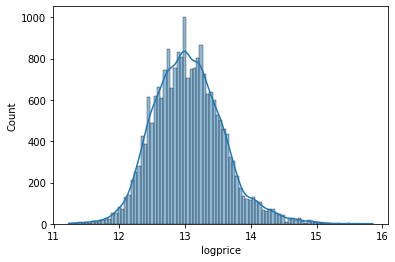

In [14]:
import seaborn as sns
sns.histplot(df['logprice'],kde=True)

<AxesSubplot:xlabel='grade'>

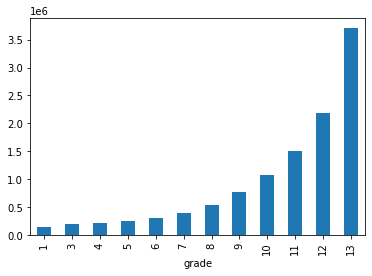

In [28]:
df.groupby('grade').mean()['price'].plot.bar()

In [37]:
import scipy.stats 

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

def print_interval(x):
    m,h = mean_confidence_interval(x)
    m,l,r = np.exp([m,m-h,m+h])
    print(f"grade={x.name:2d}, price={l:11.2f}..{r:11.2f}, count={len(x)}")

_ = df.groupby('grade')['logprice'].apply(print_interval)

grade= 1, price=        nan..        nan, count=1
grade= 3, price=   27939.57.. 1115477.21, count=3
grade= 4, price=  163161.12..  231563.54, count=29
grade= 5, price=  212494.22..  237990.89, count=242
grade= 6, price=  275726.22..  285055.67, count=2038
grade= 7, price=  372809.88..  378569.03, count=8981
grade= 8, price=  502238.51..  511550.53, count=6068
grade= 9, price=  709981.21..  730517.94, count=2615
grade=10, price=  964921.59.. 1009964.09, count=1134
grade=11, price= 1317649.76.. 1426917.32, count=399
grade=12, price= 1834227.20.. 2182319.69, count=90
grade=13, price= 2568014.68.. 4399546.80, count=13


c:\winapp\conda\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\winapp\conda\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


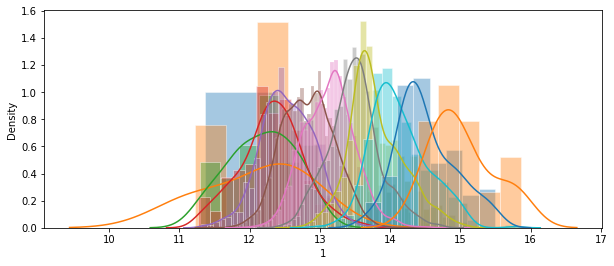

In [41]:
args = { "stat" : "density", "kde_kws" : dict(cut=3),
         "alpha": .4, "edgecolor" : (1, 1, 1, .4) }

plt.figure(figsize=(10,4))
_ = df.groupby('grade')['logprice'].apply(lambda x : sns.histplot(x, kde=True, label=x.name, **args))